In [1]:
# Imports
from sklearn.cluster import KMeans
import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import time
import pandas as pd
from sklearn.metrics import silhouette_score

c:\Users\Shaan\miniconda3\envs\HW4\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Reformat file 
input_filename = "congress.txt"
output_filename = "congress_edgelist.txt"
with open(input_filename, 'r') as input_file, open(output_filename, 'w') as output_file:
    for line in input_file:
        nums = line.split(" ")
        num1 = nums[0]
        num2 = nums[1]
        output_file.write(f"{num1} {num2}\n")


In [3]:
# Dataset 1
!deepwalk --format edgelist --input congress_edgelist.txt --seed 42 --undirected False --output outputs/congress_embed.txt

Number of nodes: 475
Number of walks: 4750
Data size (walks*length): 190000
Walking...
Training...


In [4]:
# Dataset 2
!deepwalk --format edgelist --input facebook_combined.txt --seed 42 --output outputs/facebook_embed.txt

Number of nodes: 4039
Number of walks: 40390
Data size (walks*length): 1615600
Walking...
Training...


In [5]:
data_1_path = "outputs/facebook_embed.txt"
data_2_path = "outputs/congress_embed.txt"

In [6]:
def get_embs(path, ret_dict):
    with open(path, 'r') as inp:
        skip_top = True
        for line in inp:
            if skip_top:
                skip_top = False
                continue
            data = line.split(" ")
            node_id = data[0]
            embeds = data[1:]
            ret_dict[node_id] = embeds
    return ret_dict

In [7]:
dataset1_embeds = get_embs(data_1_path, {})
dataset2_embeds = get_embs(data_2_path, {})

In [8]:
def plot_embeddings(embeds, k, n_neighbors = 15, min_dist=0.1, seed=42):
    embed_matrix = np.array(list(embeds.values()))

    # UMAP for dim reduction (so we can see clusters on a 2d plot)
    umap_model = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=seed)
    umap_embed = umap_model.fit_transform(embed_matrix)

    # Use K means for actually clustering
    num_clusters = k 
    kmeans = KMeans(n_clusters=num_clusters, random_state=seed)
    cluster_assignments = kmeans.fit_predict(umap_embed)

    # Plot the clusters
    plt.figure(figsize=(10, 8))
    for cluster in range(num_clusters):
        plt.scatter(umap_embed[cluster_assignments == cluster, 0], umap_embed[cluster_assignments == cluster, 1], label=f'Cluster {cluster + 1}')
    plt.title('UMAP Clustering')
    plt.legend()
    plt.show()
    print(f"Silhouette Score: {silhouette_score(umap_embed, cluster_assignments)}")

c:\Users\Shaan\miniconda3\envs\HW4\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Shaan\miniconda3\envs\HW4\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Shaan\miniconda3\envs\HW4\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Shaan\miniconda3\e

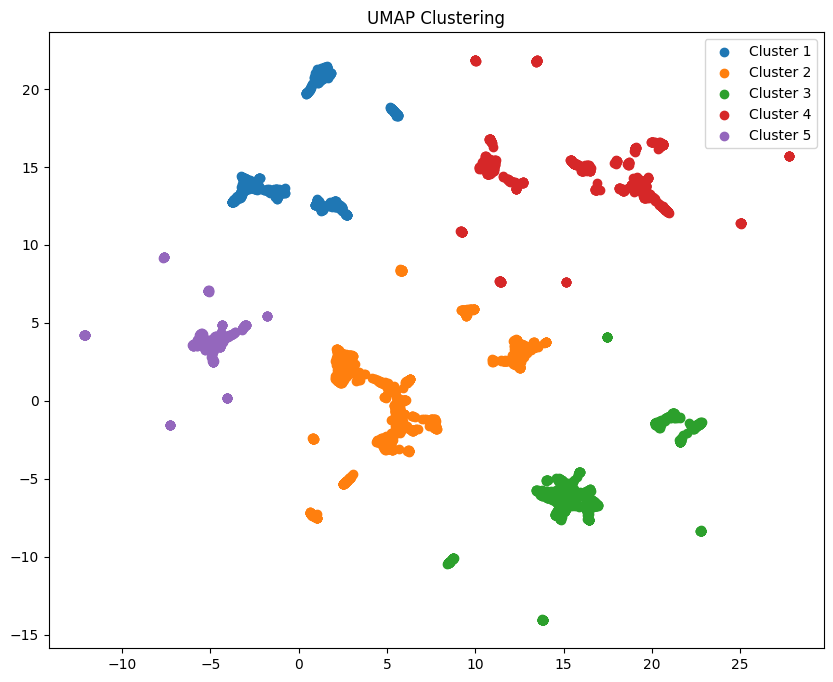

Silhouette Score: 0.5406458377838135


In [9]:
plot_embeddings(dataset1_embeds, 5)

c:\Users\Shaan\miniconda3\envs\HW4\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Shaan\miniconda3\envs\HW4\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


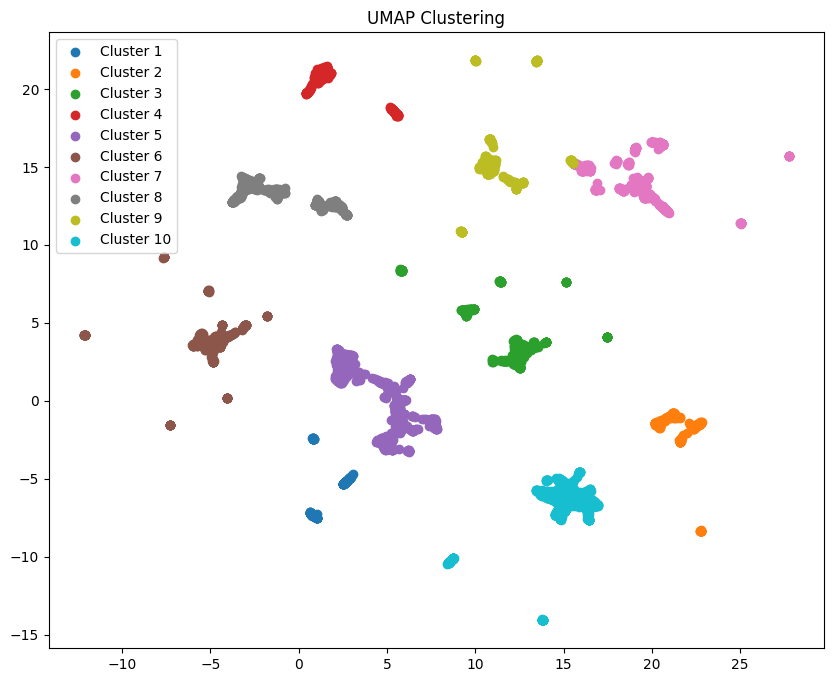

Silhouette Score: 0.6273378133773804


In [10]:
plot_embeddings(dataset1_embeds, 10)

c:\Users\Shaan\miniconda3\envs\HW4\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Shaan\miniconda3\envs\HW4\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


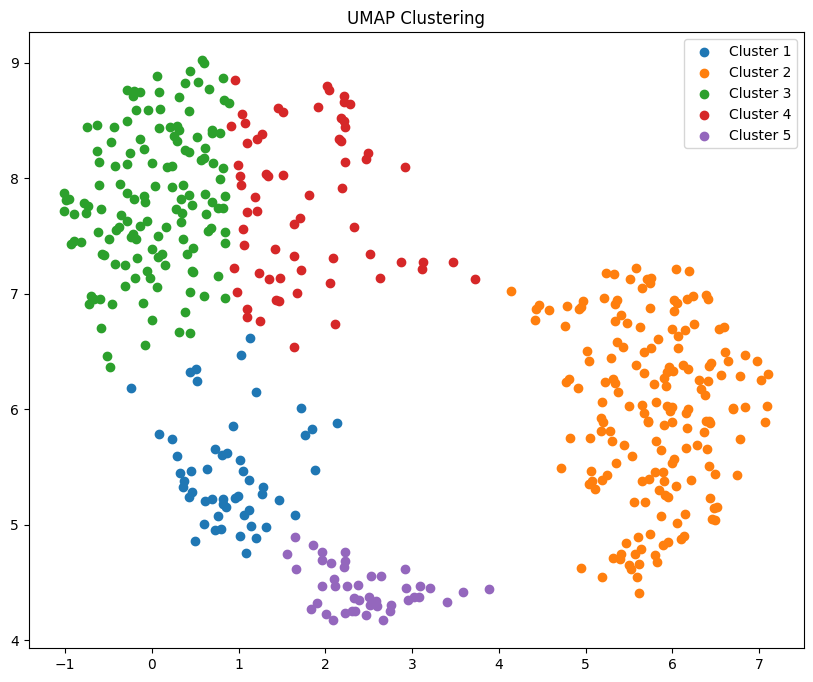

Silhouette Score: 0.5347772240638733


In [11]:
plot_embeddings(dataset2_embeds, 5)

c:\Users\Shaan\miniconda3\envs\HW4\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Shaan\miniconda3\envs\HW4\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


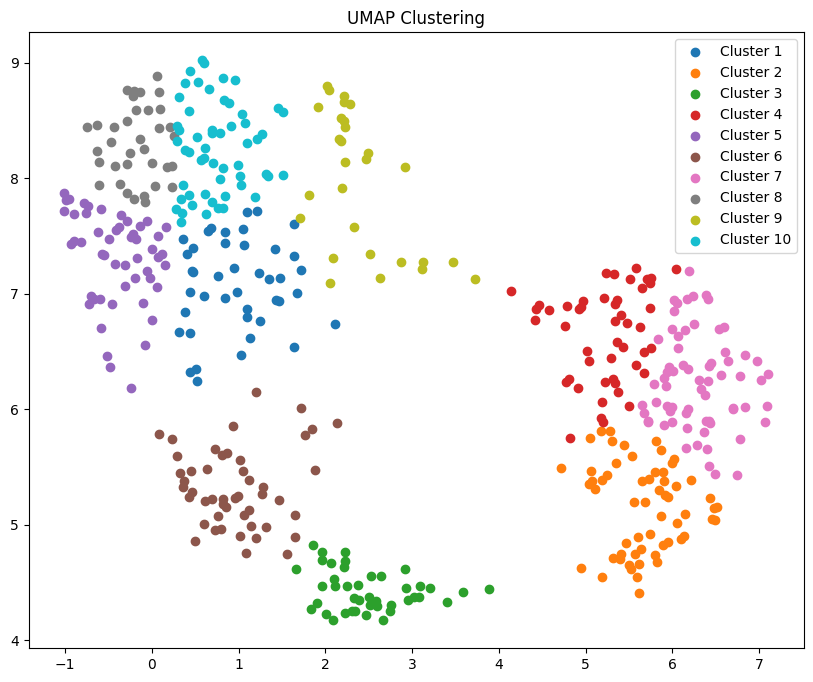

Silhouette Score: 0.4013594686985016


In [12]:
plot_embeddings(dataset2_embeds, 10)

# Top K closest nodes

In [32]:
# Find the closest k nodes based on embedding distances
def find_closest_nodes(k, embeds, node):
    embedding_matrix = np.array(list(embeds.values()))
    query_node = node
    start_time = time.time()
    distances = pairwise_distances([embeds[query_node]], embedding_matrix, metric='euclidean')
    top_indices_K = np.argsort(distances)[0][1:k+1]
    top_nodes_K = [list(embeds.keys())[i] for i in top_indices_K]
    distance = [round(distances[0][int(i)], 2) for i in top_indices_K]
    end_time = time.time()
    max_dist = max(distances[0])
    avg_dist = sum(distances[0])/len(distances[0])
    return top_nodes_K, distance, (end_time - start_time), max_dist, avg_dist

In [33]:
results_df = pd.DataFrame(columns=["Query Node", "K", "Top Nodes", "Distances", "Runtime", "Max Distance", "Avg Distance"])
for i in ["1", "2", "3", "4", "5"]:
    for k in [3, 5]:
        nodes, distance, runtime, max_dist, avg_dist = find_closest_nodes(k, dataset1_embeds, i)
        results_df.loc[len(results_df)] = [i, k, nodes, distance, runtime, max_dist, avg_dist]

In [34]:
results_df.to_csv('facebook.csv', index=False)

In [35]:
results_df = pd.DataFrame(columns=["Query Node", "K", "Top Nodes", "Distances", "Runtime", "Max Distance", "Avg Distance"])
for i in ["1", "2", "3", "4", "5"]:
    for k in [3, 5]:
        nodes, distance, runtime, max_dist, avg_dist = find_closest_nodes(k, dataset2_embeds, i)
        results_df.loc[len(results_df)] = [i, k, nodes, distance, runtime, max_dist, avg_dist]

In [36]:
results_df.to_csv('congress.csv', index=False)